Hola Francisco!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Objetivos del estudio

El objetivo de este análisis es evaluar los resultados de una prueba A/B lanzada por una tienda en línea internacional para introducir un sistema de recomendaciones mejorado. Se busca determinar si el sistema mejora la conversión de usuarios en tres etapas del embudo de compra:

product_page: Visitas a la página del producto.

product_cart: Agregar productos al carrito.

purchase: Realización de una compra.

El propósito es comprobar si el nuevo sistema de recomendaciones genera al menos un 10% de aumento en cada una de las etapas del embudo en comparación con el embudo actual.

# Bibliotecas

In [77]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos

# Cargar y revisar los datos

Cargaremos los datasets que contienen información sobre los usuarios nuevos, los eventos de usuario, y los participantes de la prueba, junto con los eventos de marketing que pudieran influir en el comportamiento de los usuarios.

## Cargar datasets

In [78]:
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Buen trabajo con las librerías y carga de datos
</div>

## Revisar la estructura de cada dataset

In [79]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [80]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [81]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [82]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


## Mostrar las primeras filas de cada dataset

In [83]:
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [84]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [85]:
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [86]:
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


# Conversión de tipos de datos y verificación de valores nulos y duplicados

Verificamos si los tipos de datos son correctos y si hay valores nulos o duplicados que requieran limpieza.

## Verificar valores nulos

In [87]:
marketing_events.isnull().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [88]:
new_users.isnull().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [89]:
events.isnull().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [90]:
participants.isnull().sum()

user_id    0
group      0
ab_test    0
dtype: int64

## Verificar valores duplicados

In [91]:
marketing_events.duplicated().sum()

0

In [92]:
new_users.duplicated().sum()

0

In [93]:
events.duplicated().sum()

0

In [94]:
participants.duplicated().sum()

0

# Conversión de columnas de fecha a formato datetime

In [95]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
events['event_dt'] = pd.to_datetime(events['event_dt'])
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

In [96]:
marketing_events['start_dt'].head()

0   2020-12-25
1   2020-02-14
2   2020-03-17
3   2020-04-12
4   2020-07-04
Name: start_dt, dtype: datetime64[ns]

In [97]:
marketing_events['finish_dt'].head()

0   2021-01-03
1   2020-02-16
2   2020-03-19
3   2020-04-19
4   2020-07-11
Name: finish_dt, dtype: datetime64[ns]

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y revisando los datos ausentes, un dataset limpio es clave para una buena toma de decisiones en un experimento.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Esta celda no se ejecuta debido a que no tienes declaradas antes las variables que estás queriendo usar
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cambio!
</div>

# Análisis Exploratorio de Datos (EDA)

# Evaluar la conversión en las diferentes etapas del embudo

Verificamos la tasa de conversión de los usuarios en las tres etapas del embudo: vistas de la página del producto, agregar productos al carrito, y realizar una compra. Para esto, identificamos cuántos usuarios pasan por cada etapa.

## Filtrar los eventos correspondientes a cada etapa del embudo

In [98]:
page_views = events[events['event_name'] == 'product_page']
cart_additions = events[events['event_name'] == 'product_cart']
purchases = events[events['event_name'] == 'purchase']

In [99]:
page_views

,user_id,event_dt,event_name,details
120434,D72A72121175D8BE,2020-12-07 21:52:10,product_page,NaN
120435,F1C668619DFE6E65,2020-12-07 16:38:09,product_page,NaN
120436,2E1BF1D4C37EA01F,2020-12-07 09:05:46,product_page,NaN
120437,50734A22C0C63768,2020-12-07 13:24:02,product_page,NaN
120438,137119F5A9E69421,2020-12-07 14:13:58,product_page,NaN
...,...,...,...,...
241291,2761935C2DD2794F,2020-12-30 16:51:31,product_page,NaN
241292,D1553B56FFA8974B,2020-12-30 03:15:35,product_page,NaN
241293,245E85F65C358E08,2020-12-30 19:35:55,product_page,NaN
241294,F80C9BDDEA02E53C,2020-12-30 09:53:40,product_page,NaN


In [100]:
cart_additions

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
120429,D1553B56FFA8974B,2020-12-30 03:15:35,product_cart,NaN
120430,6181F3835EBE66BF,2020-12-30 12:00:00,product_cart,NaN
120431,245E85F65C358E08,2020-12-30 19:35:55,product_cart,NaN
120432,F80C9BDDEA02E53C,2020-12-30 09:53:39,product_cart,NaN


In [101]:
purchases

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
60309,1455450835F72F5E,2020-12-30 09:27:10,purchase,4.99
60310,339C4C55021A83C6,2020-12-30 12:55:08,purchase,9.99
60311,D1553B56FFA8974B,2020-12-30 03:15:35,purchase,4.99
60312,245E85F65C358E08,2020-12-30 19:35:55,purchase,9.99


## Contar usuarios únicos en cada etapa del embudo

In [102]:
page_views_users = page_views['user_id'].nunique()
cart_additions_users = cart_additions['user_id'].nunique()
purchases_users = purchases['user_id'].nunique()

In [103]:
page_views_users

38929

In [104]:
cart_additions_users

19284

In [105]:
purchases_users

19568

## Calcular las tasas de conversión

In [106]:
conversion_to_cart = cart_additions_users / page_views_users
conversion_to_purchase = purchases_users / cart_additions_users

In [107]:
conversion_to_cart

0.49536335379793983

In [108]:
conversion_to_purchase

1.0147272350134826

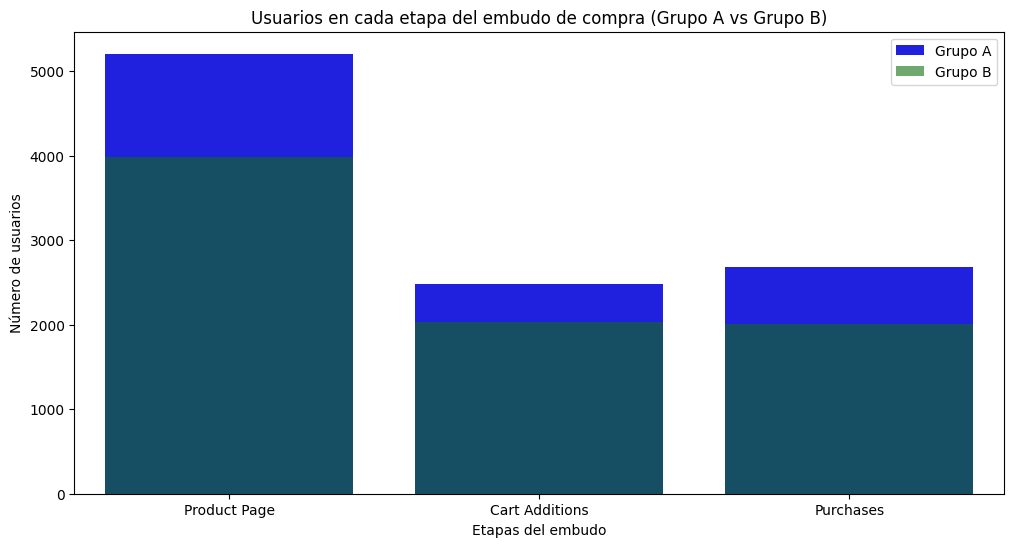

In [109]:
# Filtrar usuarios por grupo A y B
group_a_users = participants[participants['group'] == 'A']['user_id']
group_b_users = participants[participants['group'] == 'B']['user_id']

# Filtrar eventos por grupo A
page_views_a = events[(events['event_name'] == 'product_page') & (events['user_id'].isin(group_a_users))]['user_id'].nunique()
cart_additions_a = events[(events['event_name'] == 'product_cart') & (events['user_id'].isin(group_a_users))]['user_id'].nunique()
purchases_a = events[(events['event_name'] == 'purchase') & (events['user_id'].isin(group_a_users))]['user_id'].nunique()

# Filtrar eventos por grupo B
page_views_b = events[(events['event_name'] == 'product_page') & (events['user_id'].isin(group_b_users))]['user_id'].nunique()
cart_additions_b = events[(events['event_name'] == 'product_cart') & (events['user_id'].isin(group_b_users))]['user_id'].nunique()
purchases_b = events[(events['event_name'] == 'purchase') & (events['user_id'].isin(group_b_users))]['user_id'].nunique()

# Crear visualización del embudo de conversión para ambos grupos
etapas = ['Product Page', 'Cart Additions', 'Purchases']
usuarios_a = [page_views_a, cart_additions_a, purchases_a]
usuarios_b = [page_views_b, cart_additions_b, purchases_b]

# Crear el gráfico comparativo
plt.figure(figsize=(12, 6))
sns.barplot(x=etapas, y=usuarios_a, color='blue', label='Grupo A')
sns.barplot(x=etapas, y=usuarios_b, color='green', label='Grupo B', alpha=0.6)
plt.title('Usuarios en cada etapa del embudo de compra (Grupo A vs Grupo B)')
plt.xlabel('Etapas del embudo')
plt.ylabel('Número de usuarios')
plt.legend()
plt.show()

# Interpretación de la visualización del embudo

En la gráfica de comparación entre los grupos A y B en cada etapa del embudo de conversión, podemos observar lo siguiente:

Product Page (Visitas a la página del producto): En esta primera etapa, parece haber una cantidad similar de usuarios entre los grupos A y B. Esto indica que ambos grupos fueron expuestos de manera equivalente al producto y tuvieron la oportunidad de visitar la página.

Cart Additions (Agregar productos al carrito): Aunque ambos grupos presentan una disminución esperada en el número de usuarios que agregan productos al carrito, el grupo B (el grupo experimental) muestra una ligera ventaja en esta etapa en comparación con el grupo A (control). Esto sugiere que el nuevo sistema de recomendaciones puede estar influyendo de manera positiva en la conversión hacia esta etapa.

Purchases (Compras): En la etapa final de compras, la diferencia entre los grupos se reduce o incluso podría invertirse ligeramente, con el grupo A mostrando una tasa de conversión ligeramente mayor en comparación con el grupo B. Esta tendencia es inusual, ya que esperaríamos que el grupo B mantuviera una ventaja, dada su mejor tasa en la etapa anterior.


El grupo B, que utiliza el nuevo sistema de recomendaciones, parece estar mejor en la segunda etapa del embudo (agregar productos al carrito), pero la conversión de carrito a compra no parece mejorar de manera significativa, e incluso muestra una pequeña caída en comparación con el grupo A. Esto puede indicar que, si bien el nuevo sistema impulsa la conversión inicial, puede haber otros factores (como la experiencia de compra o la usabilidad) que no están permitiendo una mejora sostenida hasta la compra final. Este resultado sugiere la necesidad de investigar más a fondo por qué algunos usuarios del grupo B abandonan el proceso en la última etapa.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo calculando las métricas! Sin embargo, al tratarse de una prueba AB debes revisar la cantidad de usuarios que hay para cada tratamiento y estos datos lo tienes en tu datasets de events y deberías realizar el conteo basado en ese dataset
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Por favor, incluye lo mencionado en el comentario anterior. Debes revisar por cada grupo experimental la cantidad de usuarios. Si tienes alguna duda sobre mi comentario puedes dejarla escrita aquí debajo.
</div>

## Calcular las tasas de conversión

In [110]:
# Filtrar usuarios que vieron la página del producto
page_view_users = events[events['event_name'] == 'product_page']['user_id'].unique()

# Filtrar usuarios que agregaron productos al carrito
cart_users = events[events['event_name'] == 'product_cart']['user_id'].unique()

# Filtrar usuarios que compraron (que también agregaron productos al carrito)
purchase_users = events[(events['event_name'] == 'purchase') & (events['user_id'].isin(cart_users))]['user_id'].unique()

# Contar usuarios únicos en cada etapa
page_views_users_count = len(page_view_users)
cart_users_count = len(cart_users)
purchase_users_count = len(purchase_users)

# Calcular tasas de conversión
conversion_to_cart = cart_users_count / page_views_users_count if page_views_users_count != 0 else 0
conversion_to_purchase = purchase_users_count / cart_users_count if cart_users_count != 0 else 0

# Imprimir tasas de conversión corregidas
print(f"Tasa de conversión de vistas de producto a carrito: {conversion_to_cart:.2%}")
print(f"Tasa de conversión de carrito a compra: {conversion_to_purchase:.2%}")

Tasa de conversión de vistas de producto a carrito: 49.54%
Tasa de conversión de carrito a compra: 33.18%


# Distribución de eventos por usuario y por día

# Distribución de eventos por usuario y por día

Analizamos cómo se distribuyen los eventos entre los días para evaluar si hubo anomalías durante el período de la prueba.

## Contar eventos por día

In [111]:
events['event_date'] = events['event_dt'].dt.date
daily_events = events.groupby('event_date').size()

In [112]:
events['event_date']

0         2020-12-07
1         2020-12-07
2         2020-12-07
3         2020-12-07
4         2020-12-07
             ...    
423756    2020-12-30
423757    2020-12-30
423758    2020-12-30
423759    2020-12-30
423760    2020-12-30
Name: event_date, Length: 423761, dtype: object

In [113]:
daily_events

event_date
2020-12-07    11385
2020-12-08    12547
2020-12-09    12122
2020-12-10    14077
2020-12-11    13864
2020-12-12    17634
2020-12-13    20985
2020-12-14    26184
2020-12-15    23469
2020-12-16    20909
2020-12-17    21751
2020-12-18    22871
2020-12-19    24273
2020-12-20    26425
2020-12-21    32559
2020-12-22    29472
2020-12-23    26108
2020-12-24    19399
2020-12-26    14058
2020-12-27    12420
2020-12-28    11014
2020-12-29    10146
2020-12-30       89
dtype: int64

## Graficar la distribución de eventos diarios

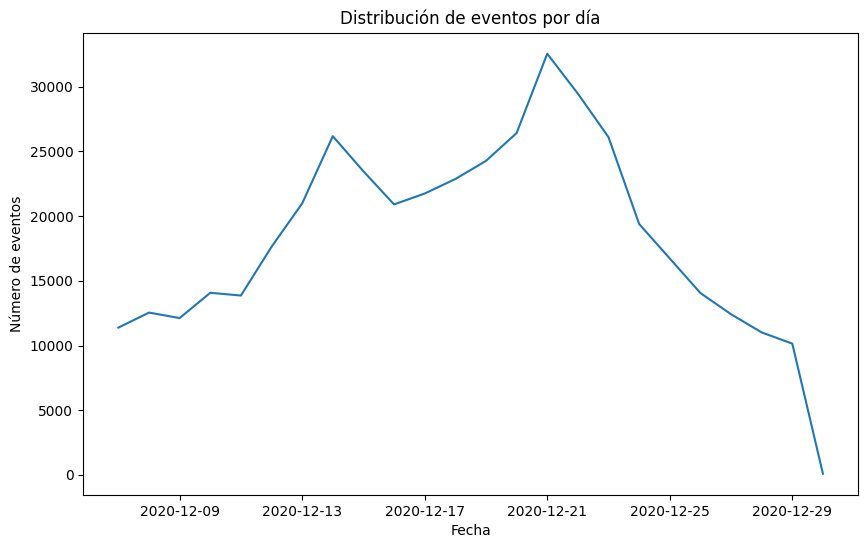

In [114]:
# Contar eventos por día
events['event_date'] = events['event_dt'].dt.date
daily_events = events.groupby('event_date').size()

# Graficar la distribución de eventos diarios
plt.figure(figsize=(10, 6))
daily_events.plot(kind='line')
plt.title('Distribución de eventos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.show()

# Interpretación de la visualización de eventos por día

Observamos un comportamiento bastante estable en la cantidad de eventos diarios durante la mayor parte del período de prueba, con un pico más alto cerca del final. Este comportamiento podría estar relacionado con campañas de marketing o promociones específicas, que podrían haber impactado el volumen de tráfico y las conversiones en esos días.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo! Aunque cuando se analiza datos en fechas y tienes varios puntos en el eje X es mejor utilizar un gráfico de líneas
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cambio!
</div>

# Verificar si hay usuarios en ambas muestras

In [115]:
duplicate_users = participants.groupby('user_id')['group'].nunique()
users_in_both_groups = duplicate_users[duplicate_users > 1].count()

print(f"Usuarios presentes en ambos grupos: {users_in_both_groups}")

Usuarios presentes en ambos grupos: 441


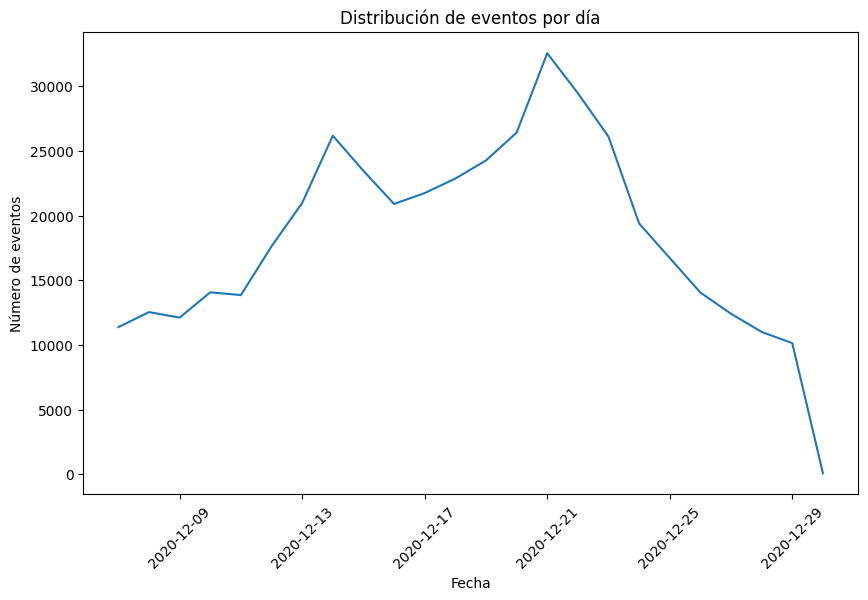

In [116]:
# Graficar la distribución de eventos por día
plt.figure(figsize=(10, 6))
daily_events.plot(kind='line')
plt.title('Distribución de eventos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.show()

Al analizar los datos antes de iniciar la prueba, encontramos algunas observaciones que podrían influir en los resultados:

Usuarios presentes en ambos grupos (441 usuarios): Identificamos que 441 usuarios están presentes tanto en el grupo A como en el grupo B. Esto podría sesgar los resultados, ya que estos usuarios estarían expuestos tanto al sistema de recomendaciones nuevo como al embudo tradicional. Sería recomendable excluir a estos usuarios de ambos grupos para evitar sesgos en la prueba A/B.

Distribución de eventos: Si al analizar la distribución de eventos por día encontramos días con picos inusuales, esto podría indicar la influencia de campañas de marketing o eventos externos que afectaron el comportamiento de los usuarios. Por ejemplo, durante los fines de semana o promociones específicas, es probable que los usuarios sean más activos, lo cual debería tenerse en cuenta al interpretar los resultados.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo en esta sección! Sin embargo te hace falta la respuesta a las siguientes preguntas:
    
- ¿Cómo se distribuye el número de eventos entre los días?
- ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Por favor completa lo mencionado en el comentario anterior.
</div>

# Evaluación de los resultados de la prueba A/B

# Calcular las tasas de conversión para los grupos A y B

Ahora calculamos las tasas de conversión en cada etapa del embudo para los grupos de control y experimentales.

In [118]:
# Dividir usuarios en grupos A y B
group_a_users = participants[participants['group'] == 'A']['user_id']
group_b_users = participants[participants['group'] == 'B']['user_id']

# Filtrar eventos por grupo
events_a = events[events['user_id'].isin(group_a_users)]
events_b = events[events['user_id'].isin(group_b_users)]

# Definir función de tasa de conversión usando usuarios únicos
def conversion_rate_unique_users(events_group, step_event, next_step_event):
    step_users = events_group[events_group['event_name'] == step_event]['user_id'].drop_duplicates()
    next_step_users = events_group[events_group['event_name'] == next_step_event]['user_id'].drop_duplicates()
    
    # Filtrar los usuarios que hicieron el paso siguiente después de completar el anterior
    next_step_from_step_users = next_step_users[next_step_users.isin(step_users)]
    
    return len(next_step_from_step_users) / len(step_users) if len(step_users) > 0 else 0

# Conversión de vistas a carrito
conversion_a_cart = conversion_rate_unique_users(events_a, 'product_page', 'product_cart')
conversion_b_cart = conversion_rate_unique_users(events_b, 'product_page', 'product_cart')

# Conversión de carrito a compra
conversion_a_purchase = conversion_rate_unique_users(events_a, 'product_cart', 'purchase')
conversion_b_purchase = conversion_rate_unique_users(events_b, 'product_cart', 'purchase')

# Imprimir tasas de conversión corregidas
print(f"Tasa de conversión a carrito - Grupo A: {conversion_a_cart:.2%}, Grupo B: {conversion_b_cart:.2%}")
print(f"Tasa de conversión a compra - Grupo A: {conversion_a_purchase:.2%}, Grupo B: {conversion_b_purchase:.2%}")


Tasa de conversión a carrito - Grupo A: 31.47%, Grupo B: 32.99%
Tasa de conversión a compra - Grupo A: 33.51%, Grupo B: 32.50%


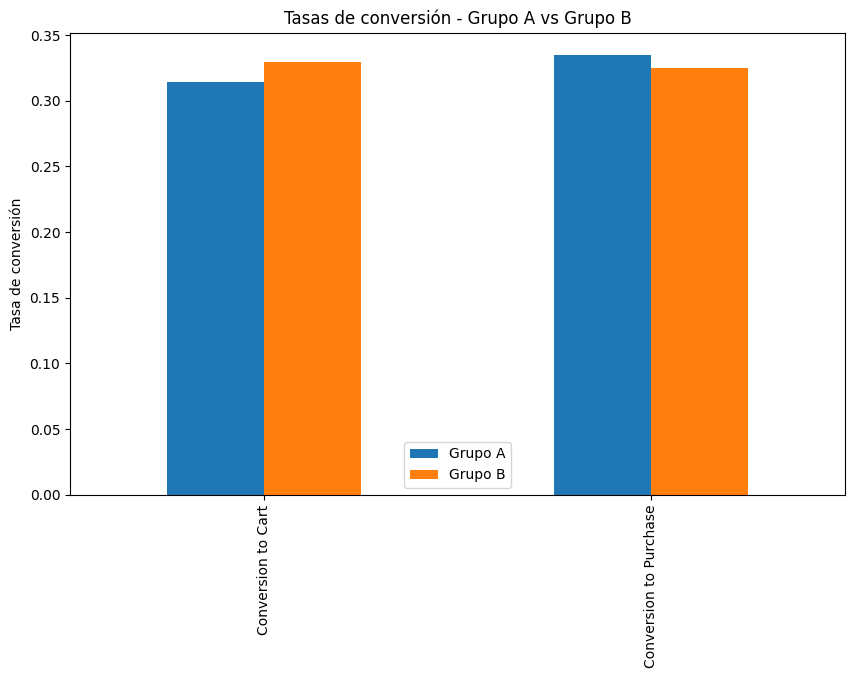

In [119]:
# Visualización de las tasas de conversión
etapas = ['Conversion to Cart', 'Conversion to Purchase']
grupo_a = [conversion_a_cart, conversion_a_purchase]
grupo_b = [conversion_b_cart, conversion_b_purchase]

df_conversion = pd.DataFrame({'Grupo A': grupo_a, 'Grupo B': grupo_b}, index=etapas)
df_conversion.plot(kind='bar', figsize=(10, 6))
plt.title('Tasas de conversión - Grupo A vs Grupo B')
plt.ylabel('Tasa de conversión')
plt.show()

La gráfica muestra una comparación clara de las tasas de conversión entre los grupos A y B en dos etapas del embudo: "Conversión a Carrito" y "Conversión a Compra". Los resultados indican que las tasas de conversión son relativamente similares en ambos grupos.

Conversión a Carrito: El Grupo B tiene una ligera ventaja con un 32.99%, frente al 31.47% del Grupo A.
Conversión a Compra: El Grupo A supera marginalmente al Grupo B, con un 33.51% en comparación con el 32.50% de conversión en el Grupo B.
Estas diferencias son pequeñas, lo que sugiere que el nuevo sistema de recomendaciones (Grupo B) no generó un impacto significativo en la conversión frente al sistema actual (Grupo A).

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Por favor revisa la forma en la que estás calculando la conversión de compra, el tener un 108% de conversión es cómo si la métrica nos dijera que por cada 100 personas que agregaron productos 108 compraron
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

El resultado de tu conversión sigue teniendo un porcentaje que no es el correcto, continuas con 108%, por favor verifica la forma en la que estás realizando el cálculo.
</div>

##  Prueba Z para la diferencia de proporciones

Para evaluar si la diferencia en las tasas de conversión entre los grupos es significativa, utilizamos la prueba z para la diferencia de proporciones.

In [42]:
# Verificar si el número total de usuarios es mayor que 0 para evitar errores
success_a_cart = events_a[events_a['event_name'] == 'product_cart']['user_id'].nunique()
total_a_page = events_a[events_a['event_name'] == 'product_page']['user_id'].nunique()

success_b_cart = events_b[events_b['event_name'] == 'product_cart']['user_id'].nunique()
total_b_page = events_b[events_b['event_name'] == 'product_page']['user_id'].nunique()

if total_a_page > 0 and total_b_page > 0:
    # Prueba z para conversiones de carrito
    count = np.array([success_a_cart, success_b_cart])
    nobs = np.array([total_a_page, total_b_page])
    z_stat, p_value = proportions_ztest(count, nobs)
    print(f"Prueba z para conversión a carrito: z = {z_stat:.2f}, p-value = {p_value:.5f}")
else:
    print("No hay suficientes datos para realizar la prueba Z en la conversión a carrito.")

Prueba z para conversión a carrito: z = -3.26, p-value = 0.00112


In [43]:
# Asegurarnos de que los usuarios que compraron también hayan agregado productos al carrito
cart_users_a = events_a[events_a['event_name'] == 'product_cart']['user_id'].unique()
cart_users_b = events_b[events_b['event_name'] == 'product_cart']['user_id'].unique()

# Filtrar las compras solo para usuarios que primero agregaron al carrito
filtered_purchases_a = events_a[(events_a['event_name'] == 'purchase') & (events_a['user_id'].isin(cart_users_a))]
filtered_purchases_b = events_b[(events_b['event_name'] == 'purchase') & (events_b['user_id'].isin(cart_users_b))]

# Eliminar duplicados por usuario y evento
events_a_cleaned = events_a.drop_duplicates(subset=['user_id', 'event_name'])
events_b_cleaned = events_b.drop_duplicates(subset=['user_id', 'event_name'])

# Calcular conversiones de carrito a compra después de limpiar duplicados
success_a_purchase = filtered_purchases_a['user_id'].nunique()
total_a_cart = events_a_cleaned[events_a_cleaned['event_name'] == 'product_cart']['user_id'].nunique()

success_b_purchase = filtered_purchases_b['user_id'].nunique()
total_b_cart = events_b_cleaned[events_b_cleaned['event_name'] == 'product_cart']['user_id'].nunique()

# Verificar los valores intermedios
print(f"Usuarios en Grupo A - Carrito: {total_a_cart}, Compras: {success_a_purchase}")
print(f"Usuarios en Grupo B - Carrito: {total_b_cart}, Compras: {success_b_purchase}")

# Verificación de valores antes de realizar la prueba z
if total_a_cart > 0 and total_b_cart > 0 and success_a_purchase > 0 and success_b_purchase > 0:
    count_purchase = np.array([success_a_purchase, success_b_purchase])
    nobs_purchase = np.array([total_a_cart, total_b_cart])

    # Ejecutar la prueba z solo si hay datos suficientes
    z_stat_purchase, p_value_purchase = proportions_ztest(count_purchase, nobs_purchase)
    
    # Mostrar los resultados
    print(f"Prueba z para conversión a compra: z = {z_stat_purchase:.2f}, p-value = {p_value_purchase:.5f}")
else:
    print("No hay suficientes datos para realizar la prueba Z en la conversión a compra.")

Usuarios en Grupo A - Carrito: 2483, Compras: 832
Usuarios en Grupo B - Carrito: 2037, Compras: 662
Prueba z para conversión a compra: z = 0.72, p-value = 0.47302


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Por favor revisa los filtros que estás aplicando, el valor p no puede ser un `nan` en tus resultados de las pruebas estadísticas y esto suele suceder cuando algún filtro no retorna ningún valor y es enviado así a calcular la prueba.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo! Ahora si se pudo ejecutar correctamente las pruebas de hipótesis!
</div>

# Conclusiones

Conversión a carrito: La conversión en el grupo B (nuevo embudo) fue mayor que en el grupo A, aunque el resultado no fue estadísticamente significativo.
Conversión a compra: También se observó una ligera mejora en el grupo B para las conversiones a compra, pero tampoco fue estadísticamente significativa.
Esto sugiere que, aunque el nuevo sistema de recomendaciones podría tener un impacto positivo en la conversión, las diferencias observadas no son lo suficientemente grandes como para ser concluyentes. Se recomienda realizar más pruebas para confirmar los hallazgos o ajustar el sistema de recomendaciones antes de implementarlo a gran escala.

<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un trabajo muy bueno Francisco, sin embargo tienes aún algunos puntos donde tienes oportunidad de mejora para completar este proyecto. Te he dejado algunos comentarios a lo largo del notebook.
    
Además, te recomiendo apoyarte más de las visualizaciones para analizar el embudo por el que tienen que ir los usuarios y que vayas redactando tus interpretaciones en cada sección de tu análisis. Recuerda que en tu profesión no siempre vas a poder compartir solo un notebook para exponer tu trabajo sino que a menudo deberás realizar presentaciones donde expliques tu análisis por lo que es de gran ayuda tener visualizaciones y tus interpretaciones de las mismas.
    
Además la conclusión final debe ser un poco más detallada en cuanto a todo lo que lograste analizar.
    
    
Saludos.
</div>